# THE SPARKS FOUNDATION #GRIPJUNE'22

# Prediction using Decision Tree Algorithm with Python Scikit Learn

#### In this Task we will create Decision Tree Classifier with the given Iris DataSet.

## AUTHOR: SEETHA SNEHALATHA

## Task 6:

### Importing Libraries

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Loading the DataSet

In [4]:
# import dataset
data = load_iris()

### Exploratory Data Analysis

In [5]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [6]:
# Print first 5 rows of the Data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# Statistics of the Data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [10]:
df.shape

(150, 5)

In [11]:
# Find null values in the DataSet
df.isnull() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
# Sum of the null values in the DataSet
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# VISUALIZATION OF THE DATA

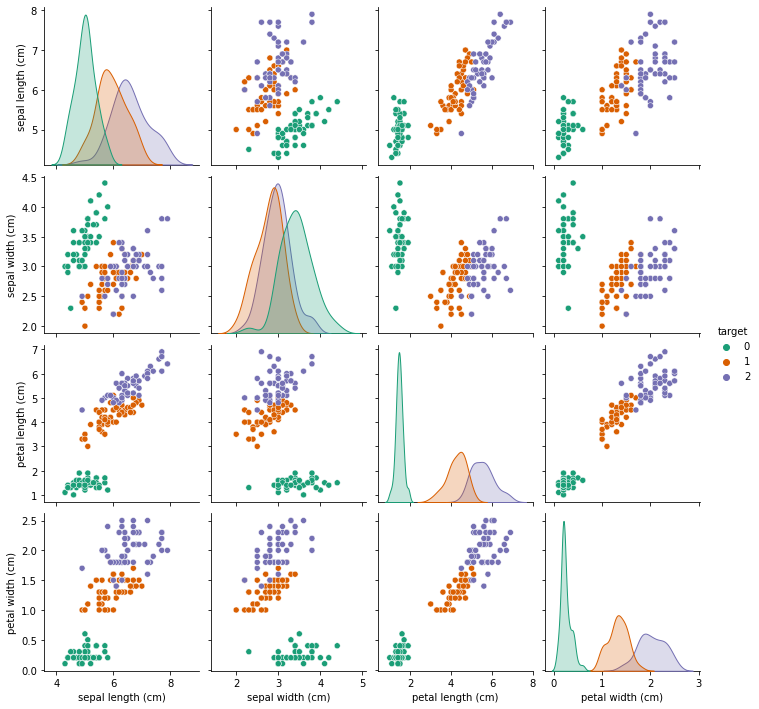

In [13]:
# Distribution of the Data
sns.pairplot(data=df, hue='target',palette='Dark2')

<AxesSubplot:>

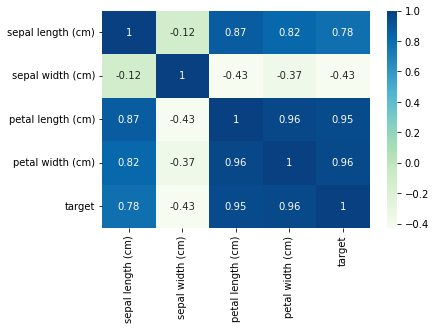

In [14]:
# Correlation of the Data
sns.heatmap(df.corr(), annot=True, cmap='GnBu')

### Splitting the data into train and test data

In [15]:
X=df.drop('target', axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #30% data as test data

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
d_tree=DecisionTreeClassifier()

In [19]:
# Apply the Desicion Tree Classifier on the training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# prediction on the test data
y_pred=d_tree.predict(X_test)

### Comparing the Actual values and the Predicted values of the Data 


In [21]:
actual_pred_data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [22]:
actual_pred_data.head()

,Actual,Predicted
33,0,0
16,0,0
43,0,0
129,2,1
50,1,1


# Evaluation

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Accuracy of the model Prediction 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9555555555555556

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [26]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

<AxesSubplot:>

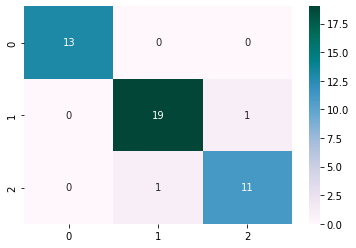

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='PuBuGn')

# VISUALIZATION OF THE DECISION TREE MODEL

In [28]:
from sklearn.tree import plot_tree

In [29]:
feature_names=['Sepal length', 'Sepal Width', 'Petal length', 'Petal width']
class_names=['Setosa', 'Versicolor', 'Virginica']

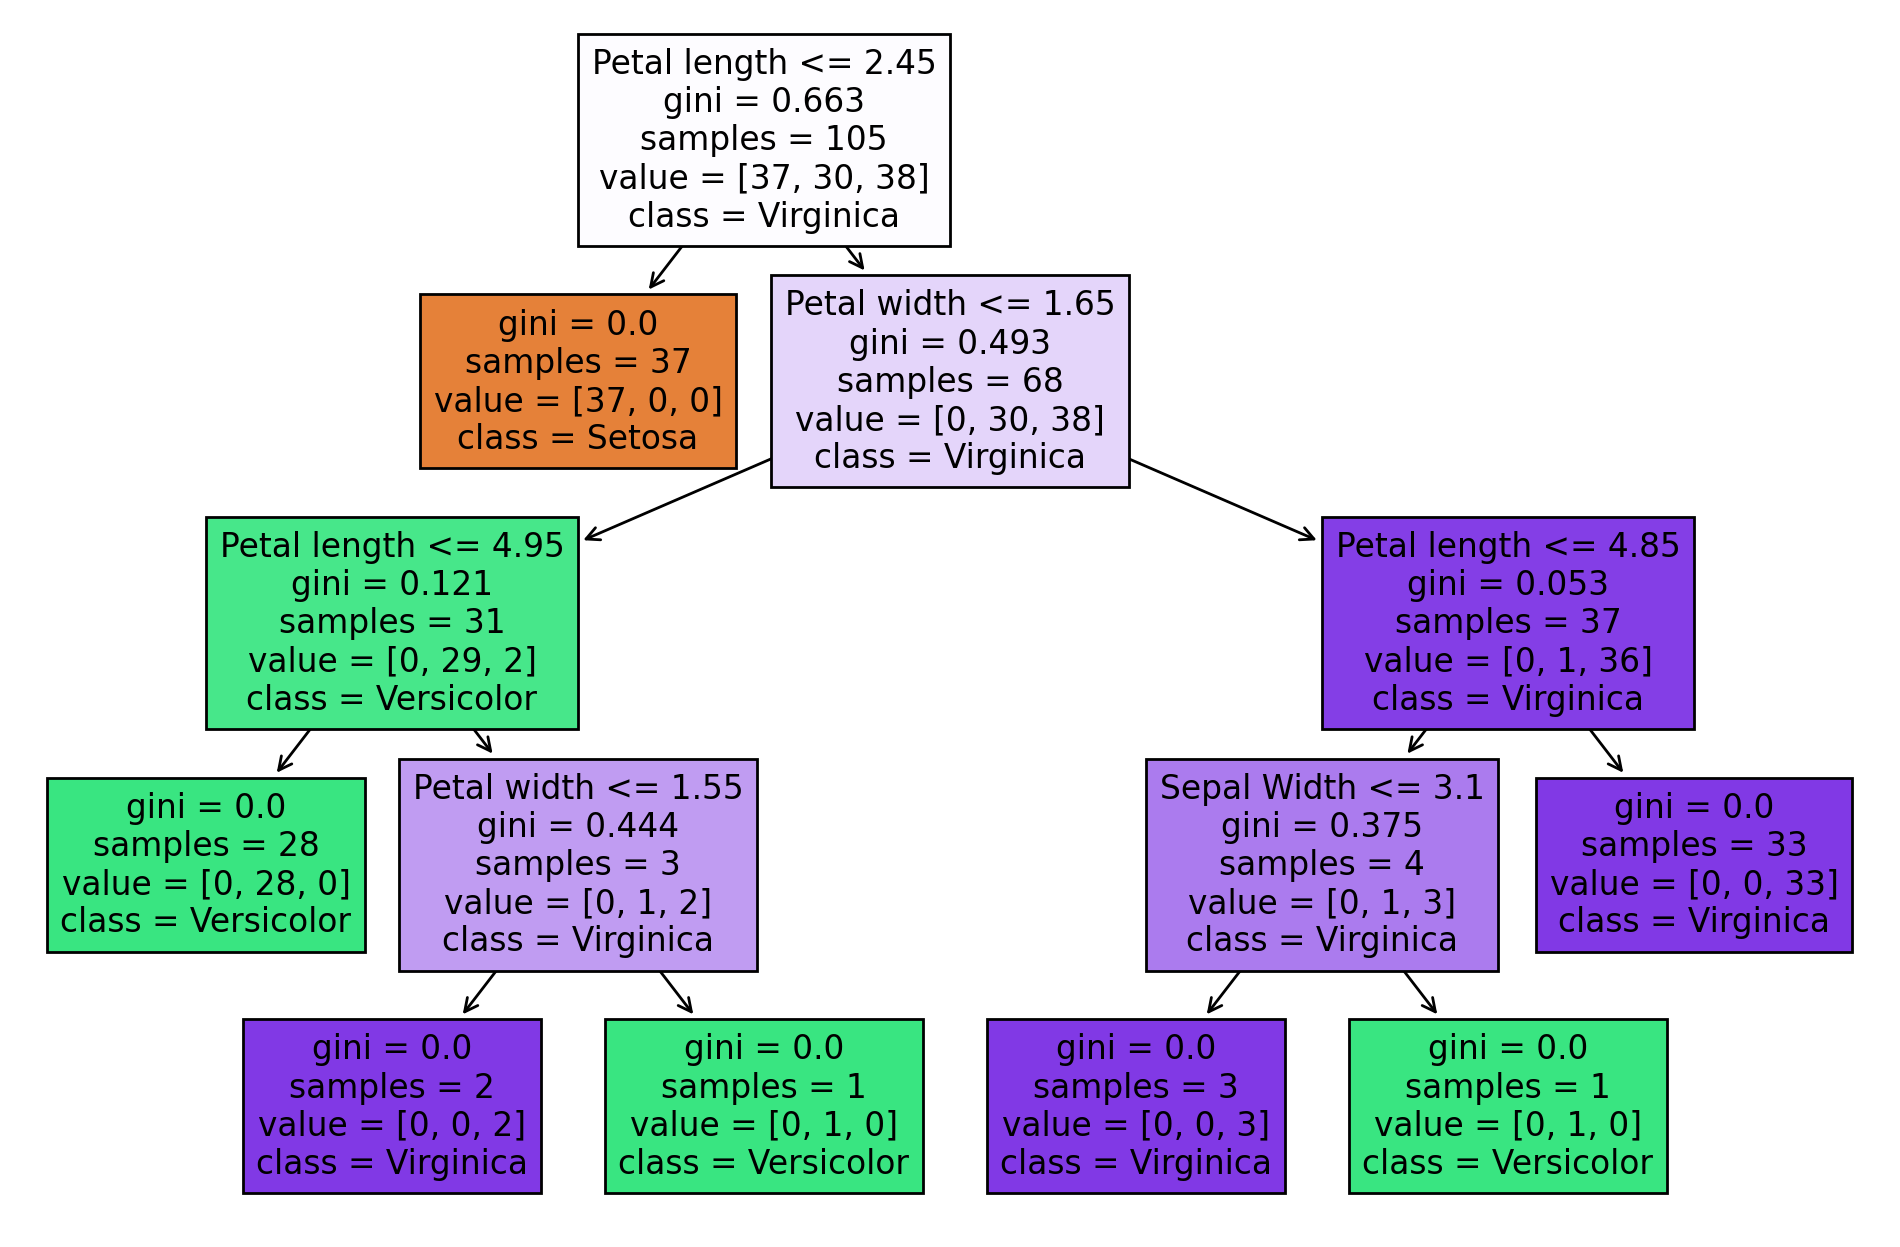

In [30]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(d_tree,class_names=class_names,feature_names=feature_names, filled=True);

In [31]:
model=DecisionTreeClassifier().fit(X,y)

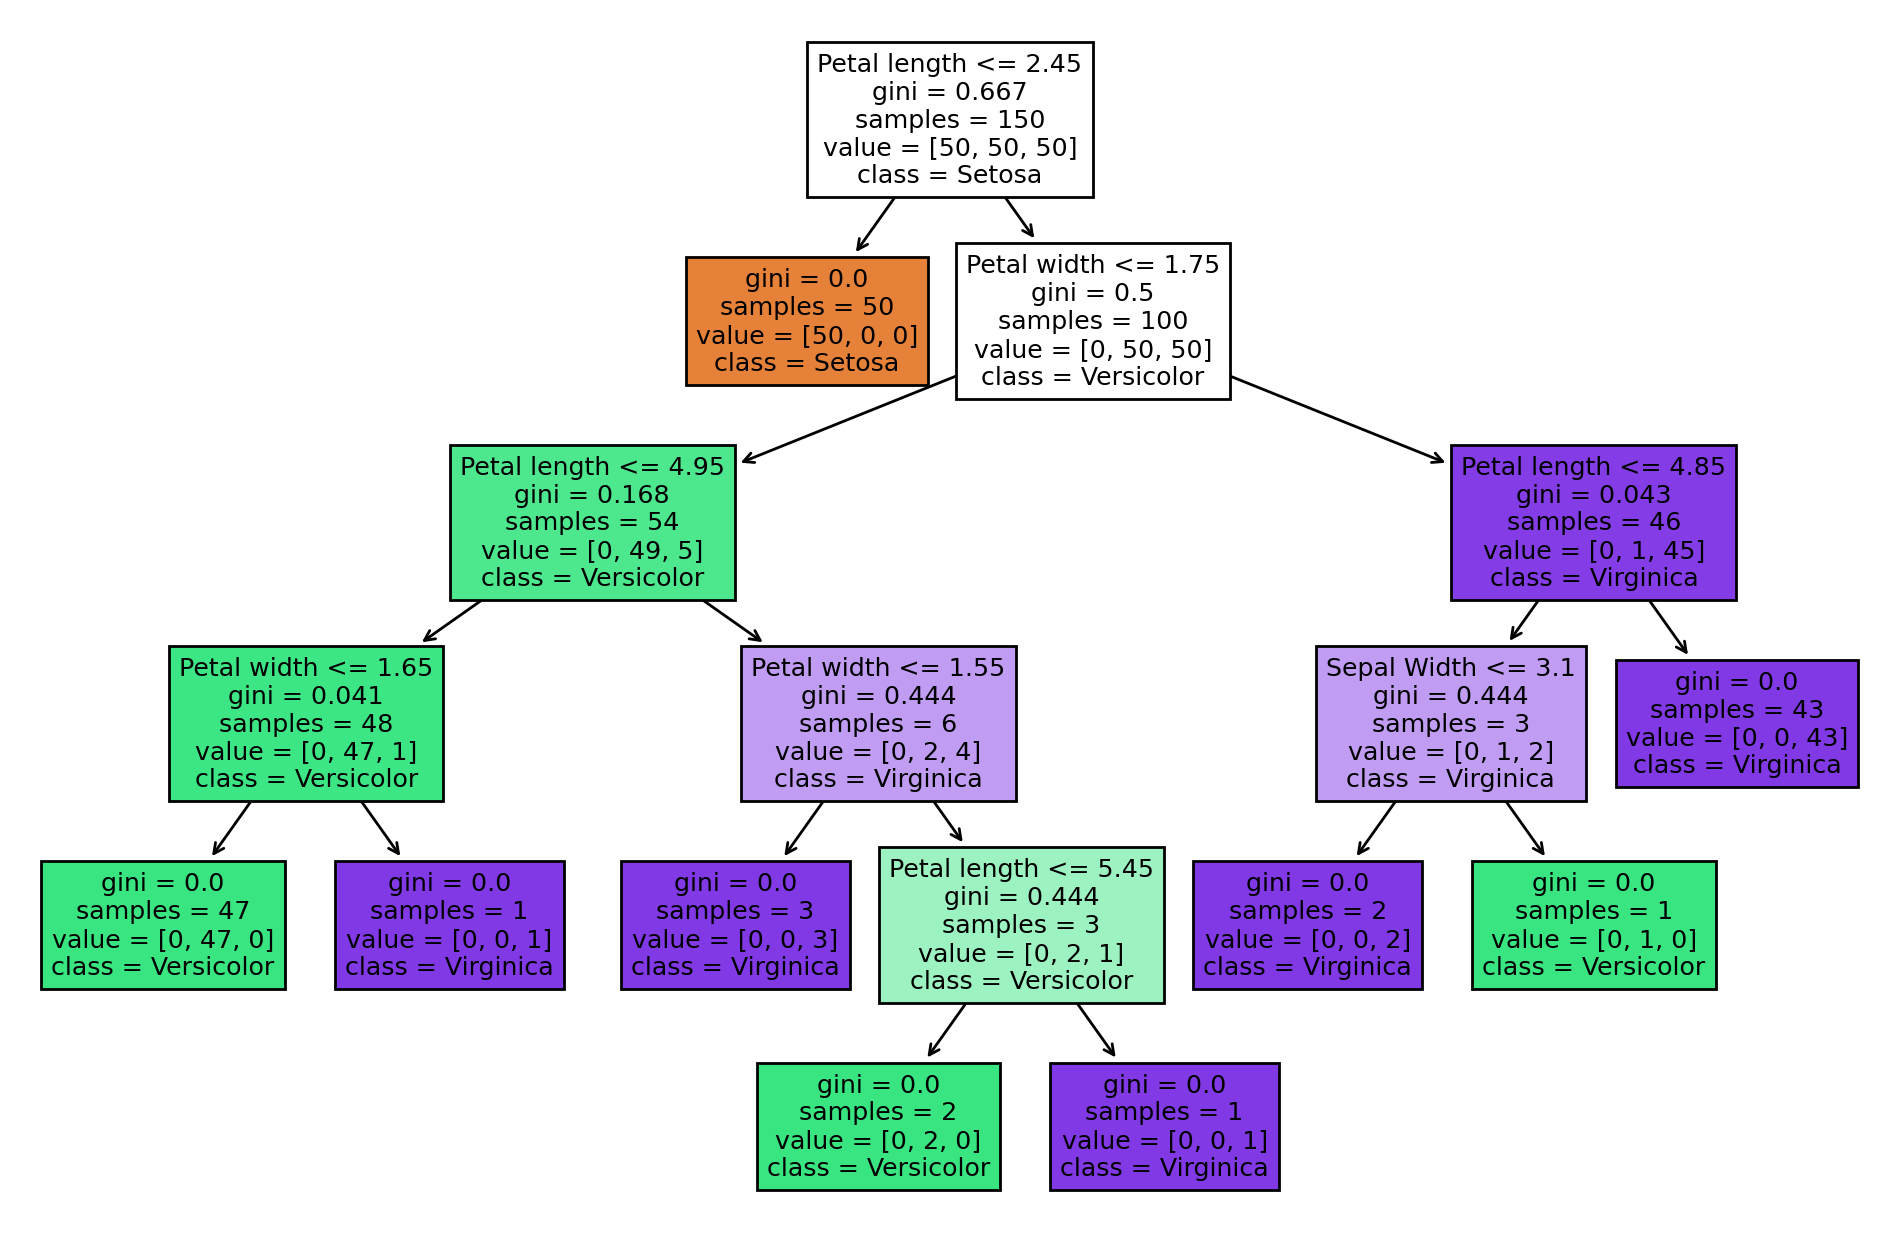

In [32]:
from sklearn import tree
plt.figure(figsize=(12,8), dpi=200)
tree=tree.plot_tree(model,feature_names=feature_names, class_names=class_names, filled=True)

# THANKYOU!